In [87]:
import warnings
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

# Домашняя работа №3

**№1**. Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.
```
Без использования статистических функций вроде `mean`, `std`, `var`, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.


In [88]:
data = pd.DataFrame([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150], columns=['payment'])

# выборочное среднее -- оценка математического ожидания (несмещенная)
mean_payment = data['payment'].sum() / data['payment'].count()

# среднее квадратическое отклонение -- уровень разброса элементов выборки относительно выборочного среднего
std_payment = np.sqrt(((data['payment'] - data['payment'].mean()) ** 2).sum() / data['payment'].count())

# смещенная выборочная дисперсия 
# квадрат среднеквадратического отклонения -- оценка дисперсии
variance_payment = ((data['payment'] - data['payment'].mean()) ** 2).sum() / data['payment'].count()

# несмещенная выборочная дисперсия
# квадрат среднеквадратического отклоения (только в знаменателе на 1 меньше) -- оценка дисперсии
variance2_payment = ((data['payment']- data['payment'].mean())**2).sum() / (data['payment'].count() - 1)

print('Рассчеты без использования статистических функций:')
print(f'Среднее арифметическое: {mean_payment}')
print(f'Cреднее квадратичное отклонение: {std_payment}')
print(f'Смещенная выборочная дисперсия: {variance_payment}')
print(f'Несмещенная выборочная дисперсия: {variance2_payment} \n')

print('Рассчеты с использованием статистических функций:')
print('Среднее арифметическое:', data['payment'].mean())
print('Cреднее квадратичное отклонение', data['payment'].std(ddof=0))
print('Смещенная выборочная дисперсия', data['payment'].var(ddof=0))
print('Несмещенная выборочная дисперсия', data['payment'].var(ddof=1))

Рассчеты без использования статистических функций:
Среднее арифметическое: 65.3
Cреднее квадратичное отклонение: 30.823854398825596
Смещенная выборочная дисперсия: 950.11
Несмещенная выборочная дисперсия: 1000.1157894736842 

Рассчеты с использованием статистических функций:
Среднее арифметическое: 65.3
Cреднее квадратичное отклонение 30.823854398825596
Смещенная выборочная дисперсия 950.11
Несмещенная выборочная дисперсия 1000.1157894736842


**№2**. Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из `boxplot`. В этой задаче можно использовать статистические функции.

In [89]:
# смотрим описание датасета
data.describe()

,payment
count,20.000000
mean,65.300000
std,31.624607
min,17.000000
25%,42.000000
50%,67.500000
75%,81.000000
max,150.000000


0.25    42.0
0.75    81.0
Name: payment, dtype: float64
Интерквартильное расстояние: 39.0


<AxesSubplot:>

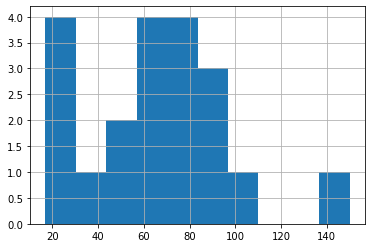

In [90]:
# вычисляем 1ый и 3ий квантили
print(data['payment'].quantile([0.25, 0.75]))

q1 = data['payment'].quantile([0.25, 0.75]).values[0]
q3 = data['payment'].quantile([0.25, 0.75]).values[1]

# вычисляем интерквартильное расстояние -- длина отрезка [quantile(0.25), quantile(0.75)]
iqr =  q3 - q1
print(f'Интерквартильное расстояние: {iqr}')

# гистограмма данных
data['payment'].hist(figsize=(6,4), bins=10, grid=True)

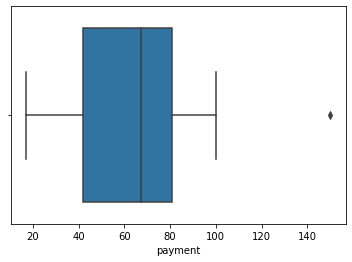

Выбросы в данных:


,payment
19,150


In [93]:
# ящик с усами
plt.figure(figsize=(6, 4))
sns.boxplot(data['payment'], whis=1.5)
plt.xlabel('payment')
plt.show()


# определяем выбросы
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
boxplot_range

outliers = data.loc[(data['payment'] < boxplot_range[0]) | (data['payment']> boxplot_range[1])]

print('Выбросы в данных:')
outliers

**№3.** В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

_Замечание_: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Пусть событие $A$ -- студент сдал первую сессию и гипотезы $H_i$ -- студент учится на $i$-ом факультете, $i = 1, 2, 3$. 
Обозначим через $x$ -- количество студентов на факультете $A$. Тогда на факультете $B$ также $x$ студентов, а на факультете $C$ -- $2x$ учащихся. 

Отсюда и по условию имеем:

$P(H_1) = \frac{x}{4x} = \frac{1}{4}$,   $P(A | H_1) = 0.8$  

$P(H_2) = \frac{x}{4x} = \frac{1}{4}$,   $P(A | H_2) = 0.7$  

$P(H_3) = \frac{2x}{4x} = \frac{1}{2}$,   $P(A | H_3) = 0.9$

Вероятность $P(H_i | A) = \frac{P(H_i)\cdot P(A | H_i)}{P(H_1)\cdot P(A | H_1) + P(H_2)\cdot P(A | H_2) + P(H_3)\cdot P(A | H_3)}$, $i =1, 2, 3$.

Посчитаем вероятность для каждого пункты задачи:

In [85]:
PH1 = 1/4
PH2 = 1/4
PH3 = 1/2

PAH1 = 0.8
PAH2 = 0.7
PAH3 = 0.9

# полная вероятность
PA = PH1 * PAH1 + PH2 * PAH2 + PH3 * PAH3

# считаем вероятность того, что студент учится на факультете А
P1 = (PH1 * PAH1) / PA

# считаем вероятность того, что студент учится на факультете B
P2 = (PH2 * PAH2) / PA

# считаем вероятность того, что студент учится на факультете C
P3 = (PH3 * PAH3) / PA

print(f'a) {P1}, б) {P2}, в) {P3}')

a) 0.24242424242424246, б) 0.21212121212121213, в) 0.5454545454545455
